In [109]:
#quite a good one - reaching about 0.935
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', padding='valid', input_shape=INPUT_SHAPE))
m.add(kl.Dropout(0.15))
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='valid' ))
m.add(kl.MaxPool2D())
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='valid' ))
m.add(kl.Dropout(0.3))

m.add(kl.Flatten())
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.5))
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.4))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
dropout_27 (Dropout)         (None, 26, 26, 20)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 40)        7240      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 10, 10, 40)        14440     
_________________________________________________________________
dropout_28 (Dropout)         (None, 10, 10, 40)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 4000)              0         
__________

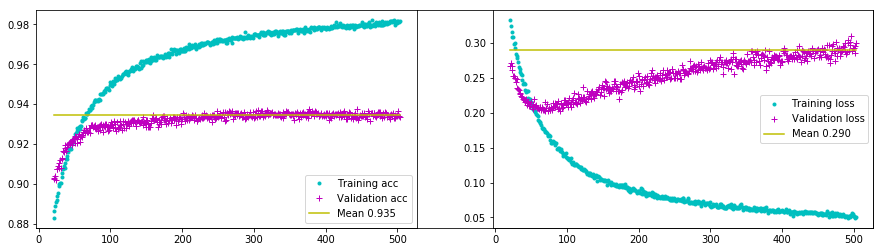

In [121]:
plot_history(history, start_x_from=20)

In [123]:
# crappy (.907)
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=5, padding='same', activation='relu', input_shape=INPUT_SHAPE))
m.add(kl.Conv2D(filters=30, kernel_size=5, padding='same', activation='relu'))
m.add(kl.MaxPool2D(pool_size=2, strides=2))

m.add(kl.Conv2D(filters=20, kernel_size=5, padding='same', activation='relu'))
m.add(kl.Conv2D(filters=30, kernel_size=3, activation='relu'))
m.add(kl.MaxPool2D(pool_size=2, strides=2))

m.add(kl.Conv2D(filters=20, kernel_size=3, padding='same', activation='relu'))
m.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu'))
m.add(kl.MaxPool2D(pool_size=2, strides=2))

m.add(kl.Flatten())

m.add(kl.Dense(units=80, activation='relu'))
m.add(kl.Dense(units=80, activation='relu'))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 28, 30)        15030     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 20)        15020     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 12, 12, 30)        5430      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 30)          0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 6, 6, 20)          5420      
__________

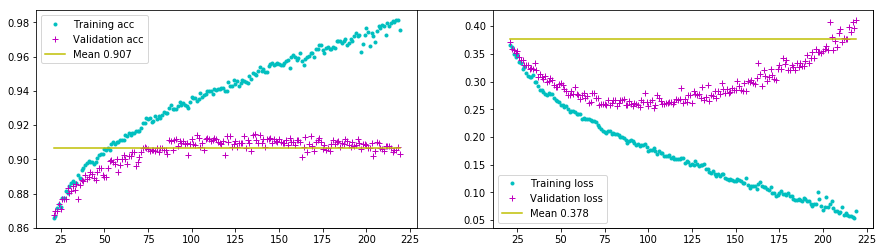

In [126]:
plot_history(history, start_x_from=20)

In [133]:
# looks good but seem have too small capacity (0.922)
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', kernel_regularizer=kl.regularizers.l2(), padding='valid', input_shape=INPUT_SHAPE))
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', kernel_regularizer=kl.regularizers.l2(), padding='valid' ))
m.add(kl.MaxPool2D())
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', kernel_regularizer=kl.regularizers.l2(), padding='valid' ))
m.add(kl.MaxPool2D())
m.add(kl.Dropout(0.3))

m.add(kl.Flatten())
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.5))
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.4))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 24, 24, 40)        7240      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 40)        14440     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 1000)              0         
__________

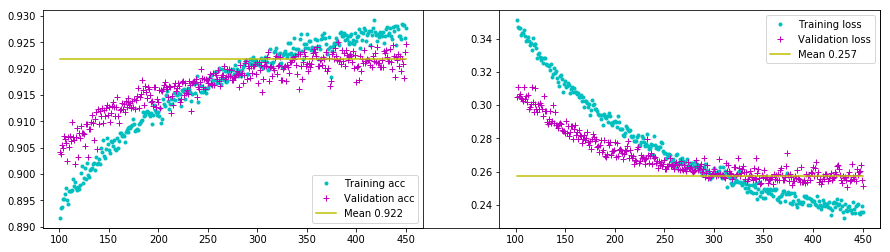

In [137]:
plot_history(history, start_x_from=100)

In [138]:
# very good (0.935) 
# and still overfits - so finetunig the regularization might make it
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', padding='same', input_shape=INPUT_SHAPE))
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m.add(kl.MaxPool2D())
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m.add(kl.MaxPool2D())
m.add(kl.Dropout(0.3))

m.add(kl.Flatten())
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.5))
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.4))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 40)        7240      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 14, 14, 40)        14440     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 40)          0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 7, 40)          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 1960)              0         
__________

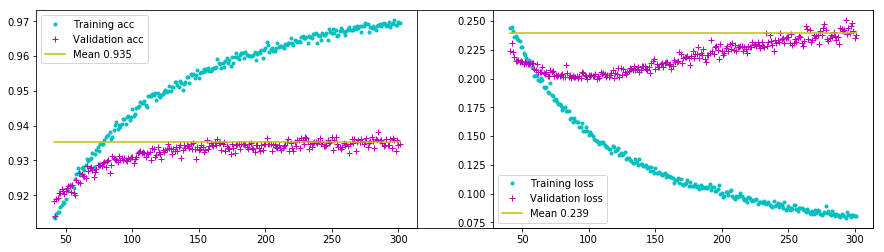

In [141]:
plot_history(history, start_x_from=40)

In [142]:
# quite poor just about 0.915
# LeNet
# https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=5, padding='same', activation='relu', input_shape=INPUT_SHAPE))
m.add(kl.MaxPool2D(pool_size=2, strides=2))


m.add(kl.Conv2D(filters=50, kernel_size=5, padding='same', activation='relu'))
m.add(kl.MaxPool2D(pool_size=2, strides=2))

m.add(kl.Flatten())

m.add(kl.Dense(units=500, activation='relu', kernel_regularizer=kl.regularizers.l2()))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 500)               1225500   
_________________________________________________________________
dense_94 (Dense)             (None, 10)                5010      
Total para

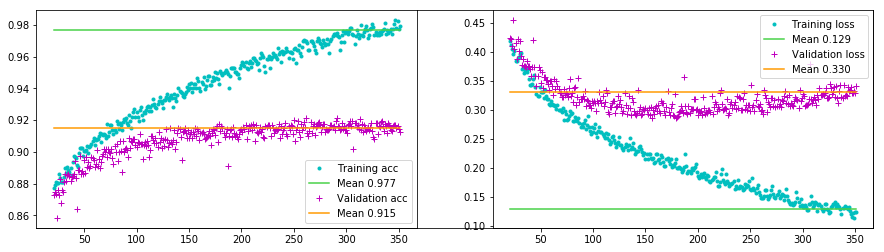

In [154]:
plot_history(history, start_x_from=20)

In [155]:
# just (0.925)
# LeNet
# https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=5, padding='same', activation='relu', input_shape=INPUT_SHAPE))
m.add(kl.Dropout(0.3))
m.add(kl.MaxPool2D(pool_size=2, strides=2))


m.add(kl.Conv2D(filters=50, kernel_size=5, padding='same', activation='relu'))
m.add(kl.Dropout(0.3))
m.add(kl.MaxPool2D(pool_size=2, strides=2))

m.add(kl.Flatten())

m.add(kl.Dropout(0.3))
m.add(kl.Dense(units=500, activation='relu', kernel_regularizer=kl.regularizers.l2()))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
dropout_41 (Dropout)         (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
dropout_42 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 2450)              0         
__________

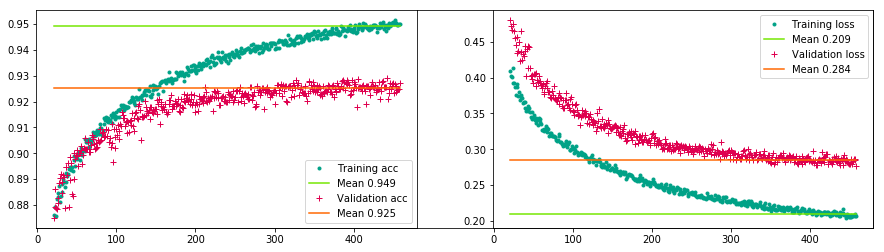

In [163]:
plot_history(history, start_x_from=20)

In [166]:
# very good (0.935) 
# and still overfits - so finetunig the regularization might make it
m = keras.Sequential()

m.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', padding='same', input_shape=INPUT_SHAPE))
m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m.add(kl.Dropout(0.2))
m.add(kl.MaxPool2D())

m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m.add(kl.Dropout(0.2))
m.add(kl.MaxPool2D(strides=1))

m.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m.add(kl.Dropout(0.2))
m.add(kl.MaxPool2D(strides=1))

m.add(kl.Flatten())

m.add(kl.Dropout(0.3))
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.5))
m.add(kl.Dense(units=100, activation='relu'))
m.add(kl.Dropout(0.4))
m.add(kl.Dense(units=10, activation='softmax'))

m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m.summary()

epoch = 0
history = {k:[] for k in m.metrics_names}
history.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 40)        7240      
_________________________________________________________________
dropout_54 (Dropout)         (None, 28, 28, 40)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 40)        14440     
_________________________________________________________________
dropout_55 (Dropout)         (None, 14, 14, 40)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 40)        0         
__________

In [171]:
# very good (0.935) 
# and still overfits - so finetunig the regularization might make it
m2 = keras.Sequential()

m2.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', padding='same', input_shape=INPUT_SHAPE))
m2.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m2.add(kl.Dropout(0.2))
m2.add(kl.MaxPool2D())

m2.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
m2.add(kl.Dropout(0.15))
m2.add(kl.MaxPool2D())

m2.add(kl.Flatten())

m2.add(kl.Dropout(0.3))
m2.add(kl.Dense(units=100, activation='relu'))
m2.add(kl.Dropout(0.5))
m2.add(kl.Dense(units=100, activation='relu'))
m2.add(kl.Dropout(0.4))
m2.add(kl.Dense(units=10, activation='softmax'))

m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

m2.summary()

epoch2 = 0
history2 = {k:[] for k in m.metrics_names}
history2.update({'val_'+k:[] for k in m.metrics_names})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 28, 28, 40)        7240      
_________________________________________________________________
dropout_60 (Dropout)         (None, 28, 28, 40)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 40)        14440     
_________________________________________________________________
dropout_61 (Dropout)         (None, 14, 14, 40)        0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 7, 7, 40)          0         
__________

In [177]:
avg = avg2 = 0
while True:
    while (avg < avg2 + 0.01):
        last_history = m.fit(**FIT_SETS, epochs=epoch+1, initial_epoch=epoch, batch_size=500, verbose=0)
        for k, v in last_history.history.items():
            history[k].append(v[0])
        avg = np.mean(history['val_acc'][-6:])
        print((STATS_STR + "{nl:} m1 avg: {m1:.4f} | m2 avg: {m2:.4f} | current {curr:}").format(
            nl=' '*100, epoch=epoch, **last_history.history, m1=avg, m2=avg2, curr='m1'), end='\r')
        epoch += 1

    while (avg2 < avg + 0.01):
        last_history2 = m2.fit(**FIT_SETS, epochs=epoch2+1, initial_epoch=epoch2, batch_size=500, verbose=0)
        for k, v in last_history2.history.items():
            history2[k].append(v[0])
        avg2 = np.mean(history2['val_acc'][-6:])
        print((STATS_STR + "{nl:} m1 avg: {m1:.4f} | m2 avg: {m2:.4f} | current {curr:}").format(
            nl=' '*100, epoch=epoch2, **last_history2.history, m1=avg, m2=avg2, curr='m2'), end='\r')
        epoch2 += 1

KeyboardInterrupt: 

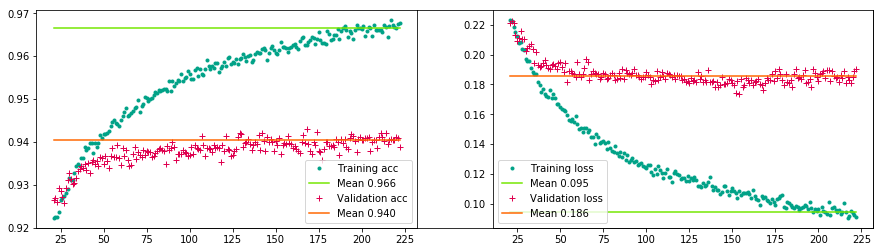

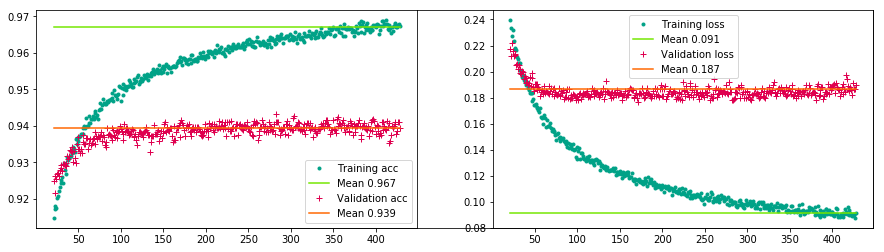

In [178]:
plot_history(history,  start_x_from=20)
plot_history(history2, start_x_from=20)

In [311]:
# very good (0.935) 
# and still overfits - so finetunig the regularization might make it
ms = keras.Sequential()

ms.add(kl.InputLayer(INPUT_SHAPE))
# 35
ms.add(kl.Dropout(0.1))   # 13 .34

ms.add(kl.Conv2D(filters=20, kernel_size=3, activation='relu', padding='same' ))
ms.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
ms.add(kl.Dropout(0.2))
ms.add(kl.MaxPool2D())

ms.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
ms.add(kl.Dropout(0.2))
ms.add(kl.MaxPool2D(strides=1))

ms.add(kl.Conv2D(filters=40, kernel_size=3, activation='relu', padding='same' ))
ms.add(kl.Dropout(0.2))
ms.add(kl.MaxPool2D(strides=1))

ms.add(kl.Flatten())

ms.add(kl.Dropout(0.35))
ms.add(kl.Dense(units=130, activation='relu'))
ms.add(kl.Dropout(0.5))
ms.add(kl.Dense(units=105, activation='relu'))
ms.add(kl.Dropout(0.4))
ms.add(kl.Dense(units=10, activation='softmax'))

ms.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

ms.summary()

epoch = 0
history = {k:[] for k in ms.metrics_names}
history.update({'val_'+k:[] for k in ms.metrics_names})


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
dropout_389 (Dropout)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 28, 28, 40)        7240      
_________________________________________________________________
dropout_390 (Dropout)        (None, 28, 28, 40)        0         
_________________________________________________________________
max_pooling2d_213 (MaxPoolin (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 14, 14, 40)        14440     
__________

In [315]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [316]:
from keras.preprocessing.image import ImageDataGenerator
BS = 500
GEN_KWARGS = dict(samplewise_center=True, samplewise_std_normalization=True)
train_gen = ImageDataGenerator(**GEN_KWARGS, horizontal_flip=True)
train_data_flow = train_gen.flow(x_train, y_train, batch_size=BS)

valid_gen = ImageDataGenerator(**GEN_KWARGS)
valid_data_flow = valid_gen.flow(x_valid, y_valid, batch_size=BS)

In [317]:
while epoch < 1000:
    last_history = ms.fit_generator(generator=train_data_flow,
                                    validation_data=train_data_flow,
                                    steps_per_epoch=len(x_train) // BS,
                                    epochs=epoch+1, initial_epoch=epoch,
                                    verbose=0)
    
    #ms.fit(**FIT_SETS, epochs=epoch+1, initial_epoch=epoch, batch_size=500, verbose=0)
    for k, v in last_history.history.items():
        history[k].append(v[0])
    print(STATS_STR.format(nl=' '*100, epoch=epoch, **last_history.history), end='\r')
    epoch += 1

KeyboardInterrupt: 

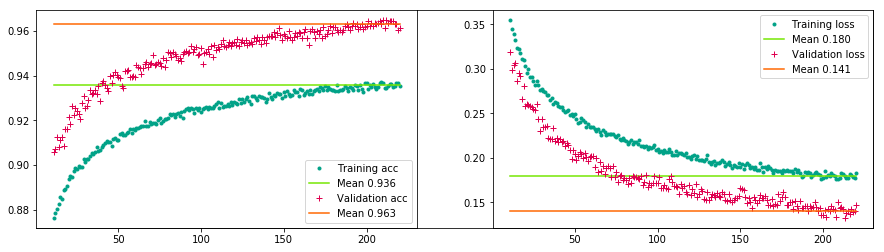

[0.22177523896098136, 0.9302999943494796]

In [314]:
plot_history(history, start_x_from=10)
test_gen = ImageDataGenerator(**GEN_KWARGS)
test_data_flow = valid_gen.flow(x_test, y_test, batch_size=BS)
ms.evaluate_generator(test_data_flow)

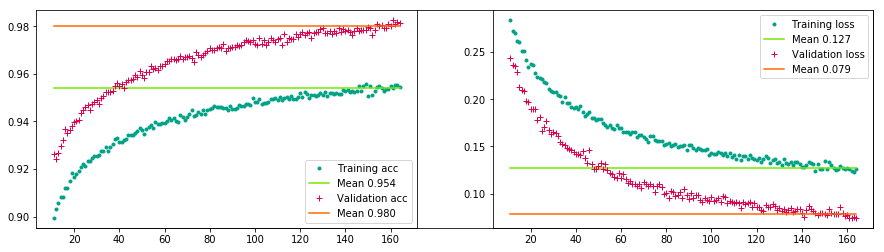

[0.1827284015715122, 0.9361000001430512]

In [310]:
plot_history(history, start_x_from=10)
test_gen = ImageDataGenerator(**GEN_KWARGS)
test_data_flow = valid_gen.flow(x_test, y_test, batch_size=BS)
ms.evaluate_generator(test_data_flow)

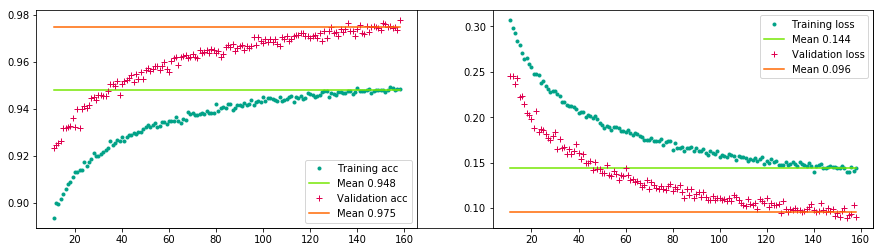

[0.1944358080625534, 0.9335999965667725]

In [273]:
plot_history(history, start_x_from=10)
test_gen = ImageDataGenerator(**GEN_KWARGS)
test_data_flow = valid_gen.flow(x_test, y_test, batch_size=BS)
ms.evaluate_generator(test_data_flow)

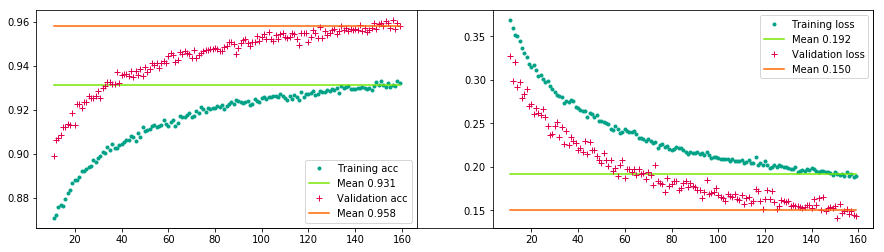

[0.21971080750226973, 0.9273999929428101]

In [267]:
plot_history(history, start_x_from=10)
test_gen = ImageDataGenerator(**GEN_KWARGS)
test_data_flow = valid_gen.flow(x_test, y_test, batch_size=BS)
ms.evaluate_generator(test_data_flow)

In [248]:
while epoch < 1000:
    last_history = ms.fit_generator(generator=train_data_flow,
                                    validation_data=train_data_flow,
                                    steps_per_epoch=len(x_train) // BS,
                                    epochs=epoch+1, initial_epoch=epoch,
                                    verbose=0)
    
    #ms.fit(**FIT_SETS, epochs=epoch+1, initial_epoch=epoch, batch_size=500, verbose=0)
    for k, v in last_history.history.items():
        history[k].append(v[0])
    print(STATS_STR.format(nl=' '*100, epoch=epoch, **last_history.history), end='\r')
    epoch += 1

KeyboardInterrupt: 

In [244]:
while epoch < 1000:
    last_history = ms.fit_generator(generator=train_data_flow,
                                    validation_data=train_data_flow,
                                    steps_per_epoch=len(x_train) // BS,
                                    epochs=epoch+1, initial_epoch=epoch,
                                    verbose=0)
    
    #ms.fit(**FIT_SETS, epochs=epoch+1, initial_epoch=epoch, batch_size=500, verbose=0)
    for k, v in last_history.history.items():
        history[k].append(v[0])
    print(STATS_STR.format(nl=' '*100, epoch=epoch, **last_history.history), end='\r')
    epoch += 1

KeyboardInterrupt: 

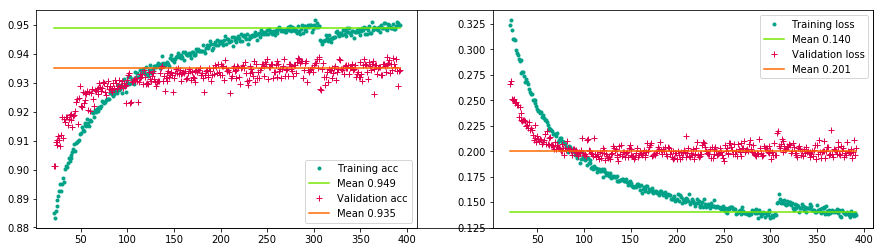

In [229]:
plot_history(history, start_x_from=20)

In [283]:
def build_model(*layers, verbose=False,
               optimizer='adam', loss='categorical_crossentropy', metrics=['acc'],
               compile_kwargs={}):
    
    model = keras.models.Sequential()
    
    for layer in layers:
        model.add(layer)
        
    if verbose:
        print("Model summary:")
        model.summary()
    
    for kw in ('optimizer', 'loss', 'metrics'):
        if not kw in compile_kwargs:
            compile_kwargs[kw] = locals()[kw]
    model.compile(**compile_kwargs)
    
    return model

Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_211 (Dense)            (None, 120)               48120 

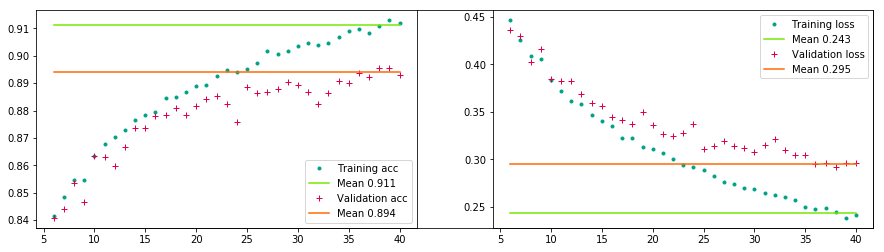

In [286]:
# baseline (validation accuracy about 0.90)
# its siblings were reaching accuracy up to 0.92 (and blazingly fast to train)
model_simple = build_model(
    kl.InputLayer(INPUT_SHAPE),
    
    kl.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same'),
    kl.MaxPool2D(pool_size=2, strides=2),
    
    kl.Conv2D(filters=16, kernel_size=5, activation='relu', padding='valid'),
    kl.MaxPool2D(pool_size=2, strides=2),
    
    kl.Flatten(),
    
    kl.Dense(units=120, activation='relu'),
    kl.Dense(units=84, activation='relu'),
    kl.Dense(units=10, activation='softmax'),
    
    verbose=1
)

#$hist = model_simple.fit(**FIT_SETS, epochs=40, batch_size=500)
hist = model_simple.fit(**FIT_SETS, epochs=40, batch_size=1000)
plot_history(hist, start_x_from=5)